In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


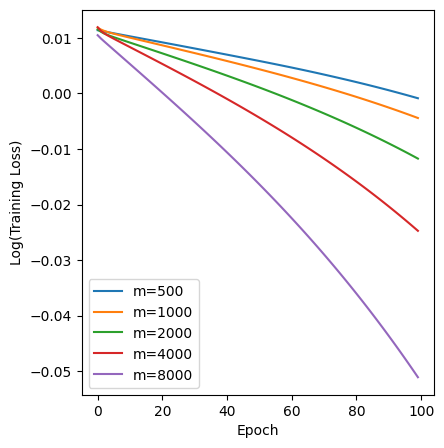

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("/content/drive/My Drive/ds&ml/data.csv")
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Convert data and labels to tensors
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).float()

# Define neural network architecture
class Net(nn.Module):
    def __init__(self, m):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(X.shape[1], m)
        self.fc2 = nn.Linear(m, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

criterion = nn.MSELoss()
# Train neural network for each value of m
m_list = [500, 1000, 2000, 4000, 8000]
epochs = 100
learning_rate = 0.1
train_loss_list = []
sign_diff_list = []
max_distance_list = []

for m in m_list:
    net = Net(m)
    optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
    train_loss = []
    sign_diff = []
    max_distance = 0.0
    for epoch in range(epochs):
        # Forward pass
        y_pred = net(X).squeeze()
        loss = criterion(y_pred,y)
        train_loss.append(loss.item())

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss_list.append(train_loss)
new_net = Net(m)
new_net.load_state_dict(torch.load('saved_weights.pth'))
plt.figure(figsize=(10, 5))
for i, m in enumerate(m_list):
    plt.subplot(1, 2, 1)
    plt.plot(range(epochs), np.log(train_loss_list[i]), label=f"m={m}")
    plt.xlabel("Epoch")
    plt.ylabel("Log(Training Loss)")
    plt.legend()
torch.save(net.state_dict(), 'saved_weights.pth')

In [ ]:
#import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("/content/drive/My Drive/ds&ml/data.csv")
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Convert data and labels to tensors
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).float()

# Define neural network architecture
class Net(nn.Module):
    def __init__(self, m):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(X.shape[1], m)
        self.fc2 = nn.Linear(m, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x
# Define function to calculate sign difference percentage
def calc_sign_diff(net, X, m):
    w0 = net.fc1.weight.detach().numpy()
    w = net.fc1.weight.detach().clone()
    sign_diff_count = 0
    print(w0.shape)
    print(w.shape)
    print(X.shape)
    for i in range(X.shape[0]):
        for r in range(m):
            if np.sign(w0[r,:].T.dot(X[i])) != np.sign(w[r,:].T.dot(X[i])):
                sign_diff_count += 1
    return sign_diff_count / (m * X.shape[0])


criterion = nn.MSELoss()
# Train neural network for each value of m
m_list = [500, 1000, 2000, 4000, 8000]
epochs = 100
learning_rate = 0.1
train_loss_list = []
sign_diff_list = []
max_distance_list = []

for m in m_list:
    net = Net(m)
    optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
    train_loss = []
    sign_diff = []
    max_distance = 0.0
    for epoch in range(epochs):
        # Forward pass
        y_pred = net(X).squeeze()
        loss = criterion(y_pred,y)
        train_loss.append(loss.item())

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


        # Calculate sign difference percentage
        if epoch % 10 == 0:
            sign_diff_pct = calc_sign_diff(net, X, m)
            sign_diff.append(sign_diff_pct)


    sign_diff_list.append(sign_diff)
# Plot training loss vs epoch and sign difference vs epoch for each value of m
plt.figure(figsize=(10, 5))
for i, m in enumerate(m_list):
    plt.plot(range(epochs // 10), sign_diff_list[i], label=f"m={m}")
    plt.xlabel("Epoch")
    plt.ylabel("Sign Difference Percentage")
    plt.legend()
plt.show()

(500, 1000)
torch.Size([500, 1000])
torch.Size([1000, 1000])


<ipython-input-9-2d3384c0b514>:38: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3571.)
  if np.sign(w0[r,:].T.dot(X[i])) != np.sign(w[r,:].T.dot(X[i])):


(500, 1000)
torch.Size([500, 1000])
torch.Size([1000, 1000])
(500, 1000)
torch.Size([500, 1000])
torch.Size([1000, 1000])
(500, 1000)
torch.Size([500, 1000])
torch.Size([1000, 1000])
(500, 1000)
torch.Size([500, 1000])
torch.Size([1000, 1000])
(500, 1000)
torch.Size([500, 1000])
torch.Size([1000, 1000])
(500, 1000)
torch.Size([500, 1000])
torch.Size([1000, 1000])
(500, 1000)
torch.Size([500, 1000])
torch.Size([1000, 1000])
(500, 1000)
torch.Size([500, 1000])
torch.Size([1000, 1000])
(500, 1000)
torch.Size([500, 1000])
torch.Size([1000, 1000])
(1000, 1000)
torch.Size([1000, 1000])
torch.Size([1000, 1000])
(1000, 1000)
torch.Size([1000, 1000])
torch.Size([1000, 1000])
(1000, 1000)
torch.Size([1000, 1000])
torch.Size([1000, 1000])
(1000, 1000)
torch.Size([1000, 1000])
torch.Size([1000, 1000])
(1000, 1000)
torch.Size([1000, 1000])
torch.Size([1000, 1000])
(1000, 1000)
torch.Size([1000, 1000])
torch.Size([1000, 1000])
(1000, 1000)
torch.Size([1000, 1000])
torch.Size([1000, 1000])
(1000, 100

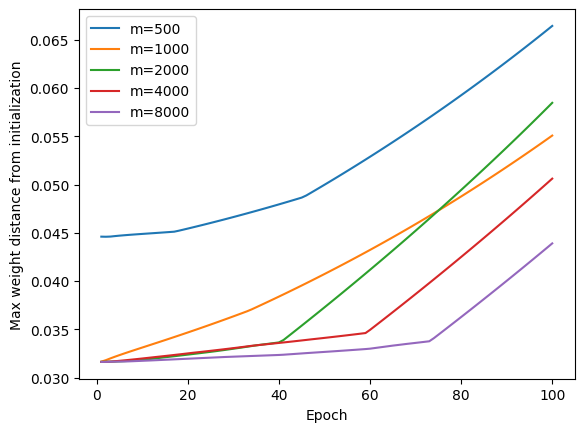

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("/content/drive/My Drive/ds&ml/data.csv")
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Convert data and labels to tensors
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).float()

# Define neural network architecture
class Net(nn.Module):
    def __init__(self, m):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(X.shape[1], m)
        self.fc2 = nn.Linear(m, 1)
        self.relu = nn.ReLU()

        self.w_initial = None # to store initial weights

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

    def max_weight_distance_from_initial(self):
        max_distance = 0
        for param in self.parameters():
            init_param = torch.zeros_like(param)
            distance = torch.max(torch.abs(param - init_param)).item()
            if distance > max_distance:
                max_distance = distance
        return max_distance

criterion = nn.MSELoss()
m_list = [500, 1000, 2000, 4000, 8000]
epochs = 100
learning_rate = 0.1
max_weight_distance_list = []

for m in m_list:
    net = Net(m)
    optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
    max_weight_distance = np.zeros(epochs)  # initialize with zeros
    for epoch in range(epochs):
        # Forward pass
        y_pred = net(X).squeeze()
        loss = criterion(y_pred, y)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate max weight distance at iteration k=50
        max_distance = net.max_weight_distance_from_initial()
        max_weight_distance[epoch] = max_distance  # append to array

    max_weight_distance_list.append(max_weight_distance)

# Plot max weight distance vs epoch for each value of m
plt.figure()
for i, m in enumerate(m_list):
    plt.plot(range(1, epochs+1), max_weight_distance_list[i], label=f"m={m}")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Max weight distance from initialization")
plt.show()